# Tinder AI Bot

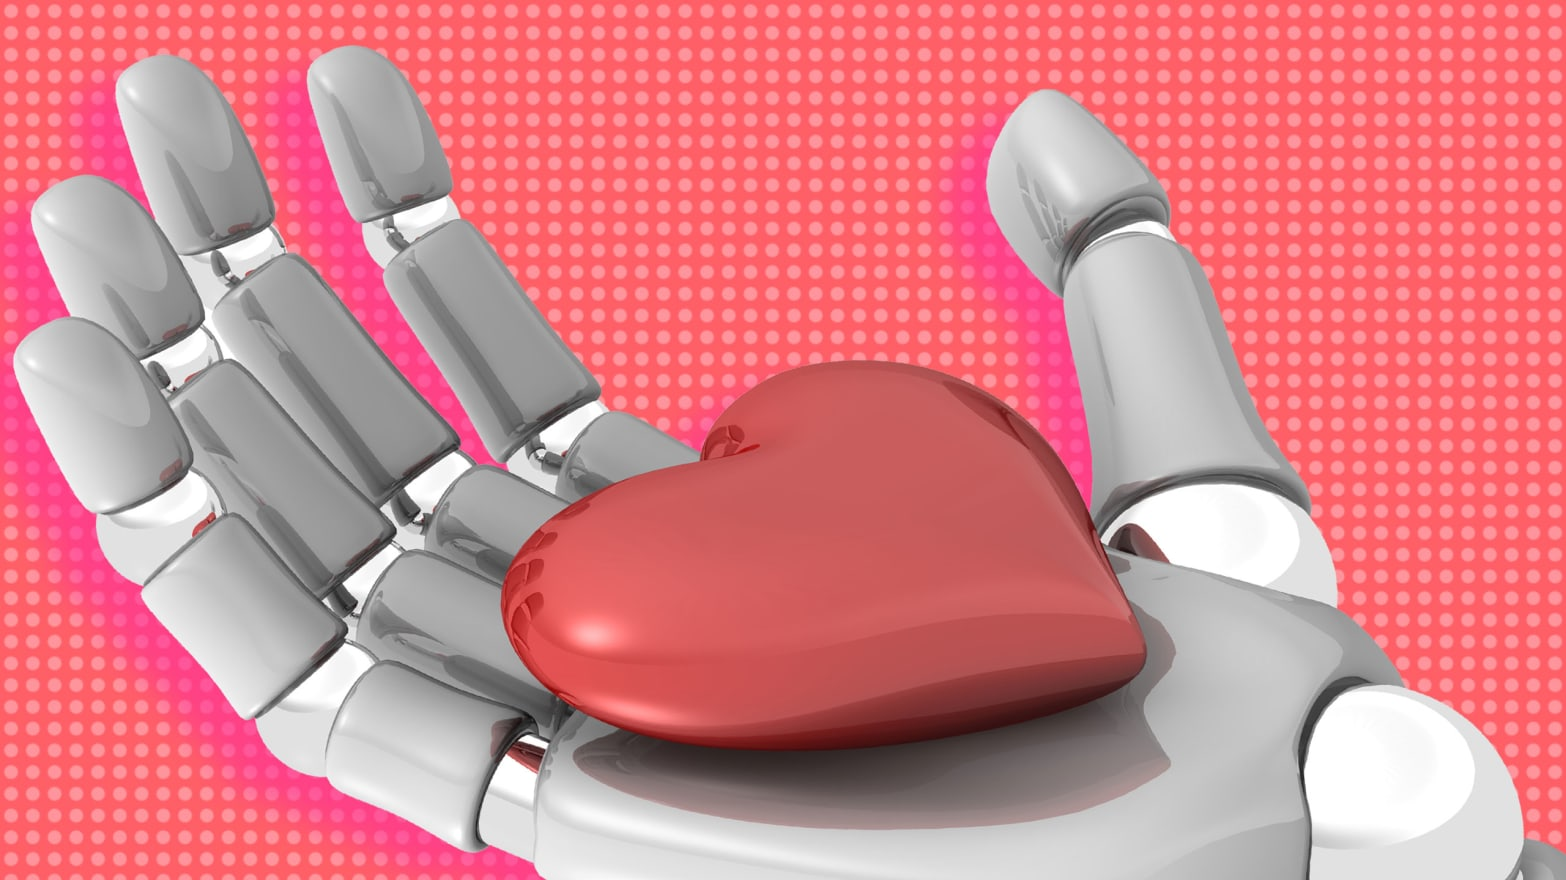

This is going to be a project that is going to be an AI oriented Swipe bot, that will be able to swipe any dating app that you plug it into. The data set that I've collected is about 3,000 profiles. Every profile has been sorted, and saved based on a preference scale of general attractiveness. 

I will be making the argument that This AI bot, is morally aceptable. It is only acceptable for a couple of reasons. The first being we have not and will not release our data set for this project. I feel as if you are to release pictures, It could go very south. Secondly, I think of this as Automation for a dating app. Tinder is not able to make the calculations on their end, if you are using this. At the End of the day, they have security flaws, its not my fault for exposing them and using them to my advantage. I am not going to sell this either. I think that this AI will solve the problem of having to sit there for hours and hours swiping, when you could easily just set your AI up to run, and then have matches happen. 

I am tempted to implement a sorting or weighted word algorithm to send the first four or five messages and just ask for the number. The User still should open the app to check The Accuracy of the AI, and see if the AI is swipping in properly. 

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import os 
import numpy as np 
import matplotlib.pyplot as plt 

## Loading the data set

In [9]:
data_dir = 'F:\Tinder_AI_Training\Pictures_Female'

In [26]:
# Get the list of folders in the dataset directory
folders = sorted(os.listdir(data_dir))

# Create an empty list to store the images and labels
images = []
labels = []

In [27]:
# Iterate over the folders
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        label = folder[-1]
        if label == '1':
            # Iterate over the image files in the folder
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.jpg'):
                    # Load the image and convert it to an array
                    image_path = os.path.join(folder_path, file_name)
                    image = load_img(image_path, target_size=(128, 128))
                    image_array = img_to_array(image) / 255.0

                    # Append the image and label to the lists
                    images.append(image_array)
                    labels.append(1)

In [28]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [29]:
# Display some example images
num_examples = 5
if len(images) >= num_examples:
    fig, axes = plt.subplots(1, num_examples, figsize=(12, 12))
    axes = axes.flatten()
    for i in range(num_examples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()
else:
    print("Insufficient images to display.")


Insufficient images to display.


In [25]:
# Display some example images
num_examples = 5
if len(images) >= num_examples:
    fig, axes = plt.subplots(1, num_examples, figsize=(12, 12))
    axes = axes.flatten()
    for i in range(num_examples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    plt.show()
else:
    print("Insufficient images to display.")

Insufficient images to display.


In [18]:
# Set the learning rate and other parameters
learning_rate = 0.0015
batch_size = 32
num_classes = 2

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(images, labels, batch_size=batch_size, epochs=epochs)